# AIMS

## Unsupervised Learning

Metrics:

KMeans Clustering is applied on the data to find groups of customers and identify the factors affecting reactions of customers to different offers.

- KMeans Cluster

The elbow method will be used to determine the number of clusters for the data set.

Notes:
- Initializing random_state to arbitrary number 42 because the seed will be set common for LogisticRegression and RandomForestClassifier models.
- For RandomForestClassifier, initializing 500 to n_estimators parameter (The number of trees in the forest) for better accuracy.
- Default parameter settings were used for KNeighborsClassifier(), GaussianNB() and DecisionTreeClassifier() in this dataset.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import json

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

In [4]:
# Crear los de drive
G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones('starbucks')

In [5]:
# csv y jsons 
offer_df = pd.read_csv(path.data_processed_dir('offer_df.csv'))
offer_df.head()

,offer_completed,offer_recived,offer_viewed,event,time,offer_id,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
0,0,1,0,offer received,0,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
1,0,0,1,offer viewed,6,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
2,1,0,0,offer completed,132,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
3,0,1,0,offer received,168,5,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1
4,0,0,1,offer viewed,216,5,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1


In [6]:
offer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   offer_completed        148805 non-null  int64  
 1   offer_recived          148805 non-null  int64  
 2   offer_viewed           148805 non-null  int64  
 3   event                  148805 non-null  object 
 4   time                   148805 non-null  int64  
 5   offer_id               148805 non-null  int64  
 6   gender                 148805 non-null  int64  
 7   age                    148805 non-null  int64  
 8   became_member_on       148805 non-null  object 
 9   income                 148805 non-null  int64  
 10  age_groups             148805 non-null  int64  
 11  salary_groups          148805 non-null  int64  
 12  member_year            148805 non-null  int64  
 13  member_month           148805 non-null  int64  
 14  member_day             148805 non-nu

In [7]:
offer_df.columns

Index(['offer_completed', 'offer_recived', 'offer_viewed', 'event', 'time',
       'offer_id', 'gender', 'age', 'became_member_on', 'income', 'age_groups',
       'salary_groups', 'member_year', 'member_month', 'member_day',
       'members_since_in_days', 'member_since_year', 'reward_y', 'difficulty',
       'duration', 'offer_type', 'email', 'web', 'mobile', 'social',
       'customer_ids'],
      dtype='object')

In [8]:
new_df = offer_df.copy()
new_df.drop(['became_member_on', 'event'], axis = 1, inplace = True)

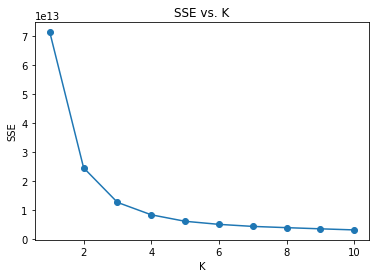

In [9]:
wcss = []
for ele in range(1,11):
    k = KMeans(n_clusters = ele, init='k-means++', random_state=42)
    k.fit(new_df)
    wcss.append(k.inertia_)
    
#Plot the Figure:    
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K');

The Graph makes an elbow at 2.

Number of optimal clusters for the dataset is 2

In [22]:
k = KMeans(n_clusters = 3, init='k-means++', random_state=42)
new = k.fit_predict(new_df)
new

array([2, 2, 2, ..., 2, 0, 0])

In [23]:
# add new column cluster to data:

new_df['cluster'] = pd.Series(new, index=new_df.index)
new_df.head()

,offer_completed,offer_recived,offer_viewed,time,offer_id,gender,age,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids,cluster
0,0,1,0,0,6,0,75,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1,2
1,0,0,1,6,6,0,75,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1,2
2,1,0,0,132,6,0,75,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1,2
3,0,1,0,168,5,0,75,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1,2
4,0,0,1,216,5,0,75,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1,2


In [24]:
# Groupby cluster data to find mean values:

c_group = new_df.groupby('cluster').mean()
c_group

,offer_completed,offer_recived,offer_viewed,time,offer_id,gender,age,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,0.223697,0.436579,0.339724,354.069665,4.682310,0.581374,55.124305,68919.764530,5.080317,5.344684,2016.564088,6.687498,15.779361,2071.326390,5.076642,4.427131,7.911926,6.630322,0.727307,1.0,0.812079,0.915732,0.650795,7043.631444
1,0.185648,0.474587,0.339765,353.658056,4.773639,0.689364,49.542045,44253.962341,4.662265,2.913564,2016.611942,6.648911,15.893431,2054.905928,5.034530,4.406031,7.760621,6.591921,0.731120,1.0,0.797665,0.922783,0.673384,7095.682622
2,0.259385,0.421560,0.319055,356.942709,4.700101,0.431644,62.512821,97223.897912,5.697186,8.135374,2016.542001,6.835891,16.097686,2074.554108,5.151615,4.528616,8.059016,6.669017,0.703492,1.0,0.811500,0.910792,0.647986,7207.035517


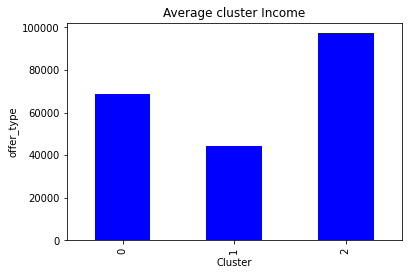

In [25]:
# Plot cluster wrt income:

c_group.income.plot(kind = 'bar', color = 'b')
plt.xlabel('Cluster')
plt.ylabel('offer_type')
plt.title('Average cluster Income');

In [26]:
# Transpose form:

trans = c_group.T
trans

cluster,0,1,2
offer_completed,0.223697,0.185648,0.259385
offer_recived,0.436579,0.474587,0.421560
offer_viewed,0.339724,0.339765,0.319055
time,354.069665,353.658056,356.942709
offer_id,4.682310,4.773639,4.700101
gender,0.581374,0.689364,0.431644
age,55.124305,49.542045,62.512821
income,68919.764530,44253.962341,97223.897912
age_groups,5.080317,4.662265,5.697186
salary_groups,5.344684,2.913564,8.135374


In [27]:
# Mean values:

mean_val = c_group.mean()
mean_val

offer_completed              0.222910
offer_recived                0.444242
offer_viewed                 0.332848
time                       354.890144
offer_id                     4.718684
gender                       0.567460
age                         55.726390
income                   70132.541594
age_groups                   5.146589
salary_groups                5.464541
member_year               2016.572677
member_month                 6.724100
member_day                  15.923493
members_since_in_days     2066.928809
member_since_year            5.087595
reward_y                     4.453926
difficulty                   7.910521
duration                     6.630420
offer_type                   0.720639
email                        1.000000
web                          0.807081
mobile                       0.916436
social                       0.657388
customer_ids              7115.449861
dtype: float64

In [28]:
# calculate difference in mean to check different clusters:

data = (c_group - mean_val) *100 / mean_val
data

,offer_completed,offer_recived,offer_viewed,time,offer_id,gender,age,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,0.352961,-1.724925,2.065824,-0.231192,-0.770831,2.451873,-1.080431,-1.729264,-1.287698,-2.193353,-0.000426,-0.544345,-0.905153,0.212759,-0.215305,-0.601597,0.017766,-0.001478,0.925186,0.0,0.619275,-0.076813,-1.002942,-1.009331
1,-16.716086,6.830732,2.078070,-0.347174,1.164636,21.482243,-11.097696,-36.899531,-9.410586,-46.682360,0.001947,-1.118200,-0.188786,-0.581678,-1.043044,-1.075348,-1.894950,-0.580641,1.454269,0.0,-1.166757,0.692648,2.433180,-0.277807
2,16.363126,-5.105807,-4.143894,0.578367,-0.393805,-23.934115,12.178127,38.628796,10.698284,48.875713,-0.001521,1.662545,1.093939,0.368919,1.258349,1.676944,1.877184,0.582119,-2.379456,0.0,0.547481,-0.615834,-1.430239,1.287138


In [29]:
# Transpose:

df = data.T
df

cluster,0,1,2
offer_completed,0.352961,-16.716086,16.363126
offer_recived,-1.724925,6.830732,-5.105807
offer_viewed,2.065824,2.078070,-4.143894
time,-0.231192,-0.347174,0.578367
offer_id,-0.770831,1.164636,-0.393805
gender,2.451873,21.482243,-23.934115
age,-1.080431,-11.097696,12.178127
income,-1.729264,-36.899531,38.628796
age_groups,-1.287698,-9.410586,10.698284
salary_groups,-2.193353,-46.682360,48.875713


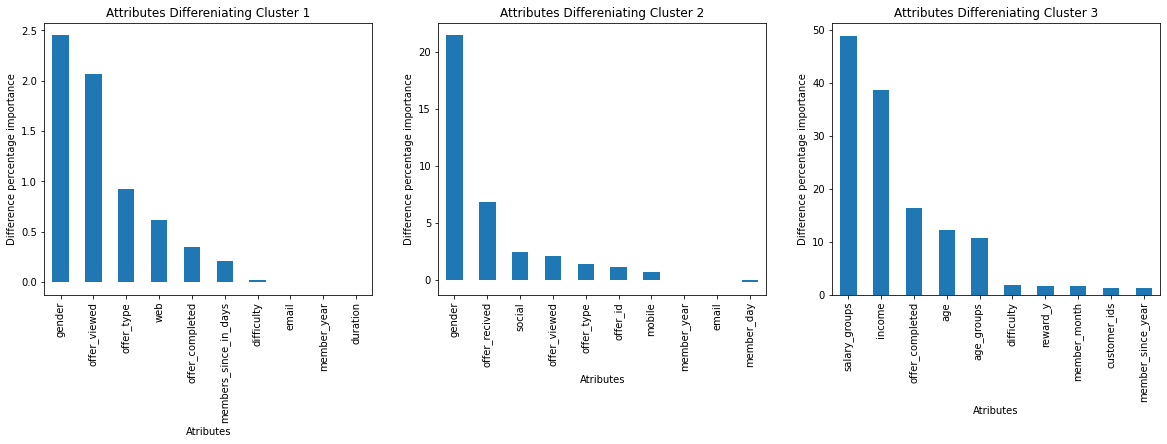

In [34]:
# Plot attributes associated with data:
color = sb.color_palette()[0]

plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
df[0].sort_values(ascending=False).head(10).plot(kind = 'bar', color = color)
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 1');

plt.subplot(1,3,2)
df[1].sort_values(ascending=False).head(10).plot(kind = 'bar', color = color)
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 2');

plt.subplot(1,3,3)
df[2].sort_values(ascending=False).head(10).plot(kind = 'bar', color = color)
plt.xlabel('Atributes')
plt.ylabel('Difference percentage importance')
plt.title('Attributes Differeniating Cluster 3');

From the above graph, the top attributes associated with offer_type are:

- income
- events
- gender
- age

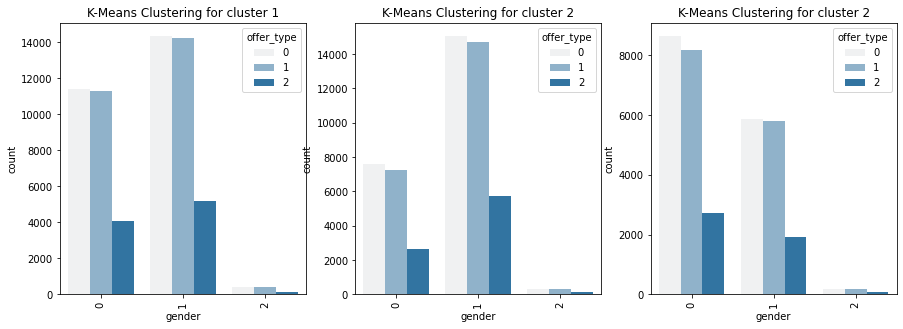

In [35]:
plt.figure(figsize = (15,5))

color = sb.color_palette()[0]

plt.subplot(1,3,1)
x = sb.countplot(data = new_df[new_df['cluster'] == 0], x = 'gender', hue = 'offer_type', color = color);
plt.title('K-Means Clustering for cluster 1');
plt.ylabel('count');
plt.xlabel('gender');
plt.xticks(rotation = 90);

plt.subplot(1,3,2)
x = sb.countplot(data = new_df[new_df['cluster'] == 1], x = 'gender', hue = 'offer_type', color = color);
plt.title('K-Means Clustering for cluster 2');
plt.ylabel('count');
plt.xlabel('gender');
plt.xticks(rotation = 90);

plt.subplot(1,3,3)
x = sb.countplot(data = new_df[new_df['cluster'] == 2], x = 'gender', hue = 'offer_type', color = color);
plt.title('K-Means Clustering for cluster 2');
plt.ylabel('count');
plt.xlabel('gender');
plt.xticks(rotation = 90);

plt.show();

Compared to BOGO and Discount offer, the informational offers are very less popular.

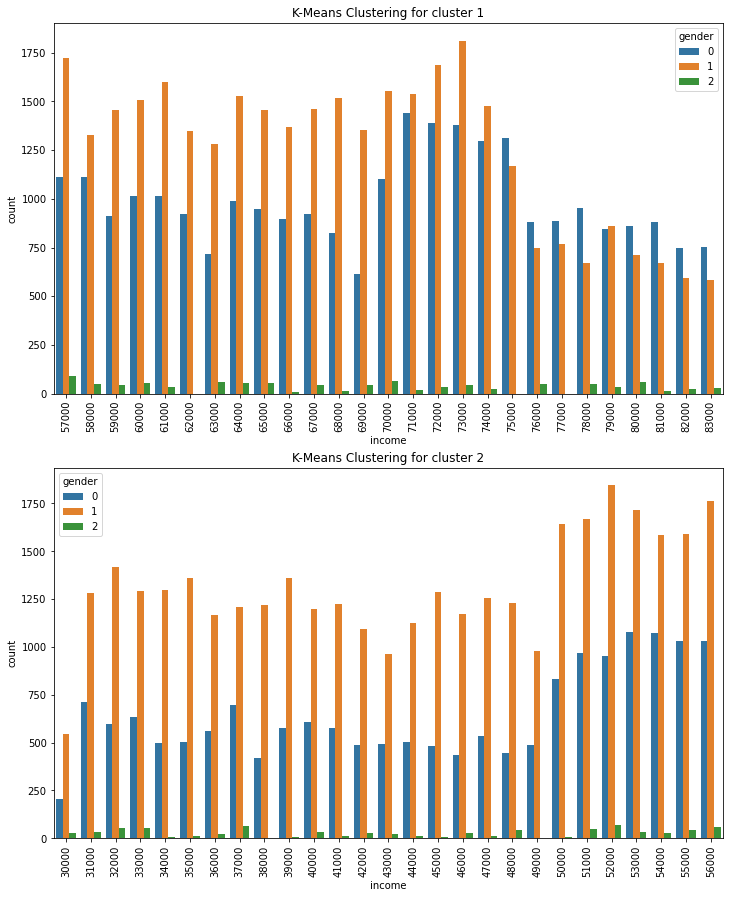

In [32]:
fig, ax = plt.subplots(2,2, figsize=(12, 15))

plt.subplot(2,1,1)
x = sb.countplot(data = new_df[new_df['cluster'] == 0], x = 'income', hue = 'gender');
plt.title('K-Means Clustering for cluster 1');
plt.ylabel('count');
plt.xlabel('income');
plt.xticks(rotation = 90);

plt.subplot(2,1,2)
x = sb.countplot(data = new_df[new_df['cluster'] == 1], x = 'income', hue = 'gender');
plt.title('K-Means Clustering for cluster 2');
plt.ylabel('count');
plt.xlabel('income');
plt.xticks(rotation = 90);

plt.show();

In [36]:
print("Income Range for Cluster 0:", new_df[new_df['cluster']==0]['income'].min(), 
      "to", new_df[new_df['cluster']==0]['income'].max())

print("Income Range for Cluster 1:", new_df[new_df['cluster']==1]['income'].min(), 
      "to", new_df[new_df['cluster']==1]['income'].max())

print("Income Range for Cluster 2:", new_df[new_df['cluster']==2]['income'].min(), 
      "to", new_df[new_df['cluster']==2]['income'].max())

Income Range for Cluster 0: 57000 to 83000
Income Range for Cluster 1: 30000 to 56000
Income Range for Cluster 2: 84000 to 120000


Compared to BOGO and Discount offer, the informational offers are less popular.

Few cases the Discount Offers are used more than the BOGO offers: In cluster1 at income = 51000, income = 52000, in cluster2 at income = 76000, income = 77000

Since the income is unevenly distributed, it can also be concluded that the annual income is indepedent of the purchasing behavior

For Cluster 0, the income ranges from 3000.0 to 68000.0. It can thus be concluded that males with the above income range tend to spend more than females and other Genders for the BOGO and Discount Offers.

For Cluster 1, the income ranges from 69000.0 to 120000.0. It can thus be concluded that females with income range 75000 to 120000 tend to spend more than males and other Genders for the BOGO and Discount Offers.

## Conclusion:

On analysis the data using supervised and unsupervised learning(Kmeans), we can conclude that:

- Different segments of customers react to offers differently.
- The count of male customers in low-income level is slightly higher than that of female and other customers
- Though the average salary of female is greater than that of the male, female spend less on Starbucks than male
- Starbucks has more of the young crowd than those of the aged once.
- The result of the offer_type was predicted by training a supervised classifier.

## Results:

Customers are attracted to BOGO and Discount offers more as compared to Informational Offers
The buying behavior of a customer is independent of its annual income
Starbucks have more male customers than females and other gender.
KNeighborsClassifier turned out to be the best algorithm for this task and predicts customer response with an accuracy rate and precision rate of almost 89% after hyperarameter tuning. Given the fact that also the same customer will react differently the same offer. So will choose KNeighborsClassifier is best algorithm for this dataset.

## Improvement:

## Reflection: